# Giới thiệu về Xác suất và Thống kê
Trong notebook này, chúng ta sẽ thực hành một số khái niệm đã được thảo luận trước đó. Nhiều khái niệm từ xác suất và thống kê được thể hiện rất tốt trong các thư viện chính dành cho xử lý dữ liệu trong Python, chẳng hạn như `numpy` và `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Biến Ngẫu Nhiên và Phân Phối
Hãy bắt đầu bằng cách lấy một mẫu gồm 30 giá trị từ một phân phối đều từ 0 đến 9. Chúng ta cũng sẽ tính trung bình và phương sai.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Để ước lượng trực quan có bao nhiêu giá trị khác nhau trong mẫu, chúng ta có thể vẽ **biểu đồ histogram**:


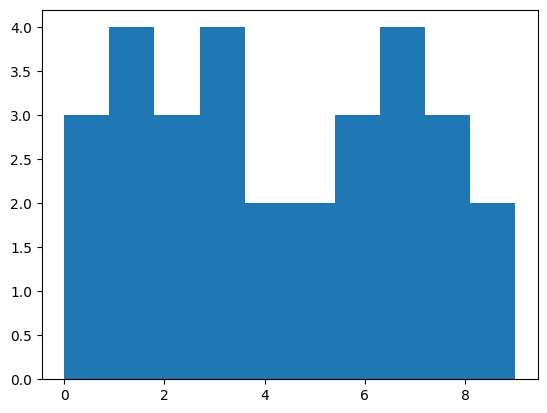

In [119]:
plt.hist(sample)
plt.show()

## Phân tích dữ liệu thực tế

Giá trị trung bình và phương sai rất quan trọng khi phân tích dữ liệu thực tế. Hãy tải dữ liệu về các cầu thủ bóng chày từ [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Chúng ta đang sử dụng một gói có tên là [**Pandas**](https://pandas.pydata.org/) ở đây để phân tích dữ liệu. Chúng ta sẽ thảo luận thêm về Pandas và cách làm việc với dữ liệu trong Python ở các phần sau của khóa học này.

Hãy tính giá trị trung bình cho tuổi, chiều cao và cân nặng:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Bây giờ hãy tập trung vào chiều cao và tính độ lệch chuẩn và phương sai:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Ngoài giá trị trung bình, việc xem xét giá trị trung vị và các tứ phân vị cũng có ý nghĩa. Chúng có thể được trực quan hóa bằng **biểu đồ hộp**:


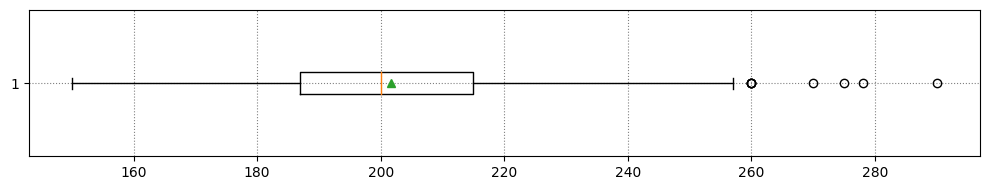

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Chúng ta cũng có thể tạo các biểu đồ hộp của các tập hợp con trong tập dữ liệu của mình, ví dụ, được nhóm theo vai trò của người chơi.


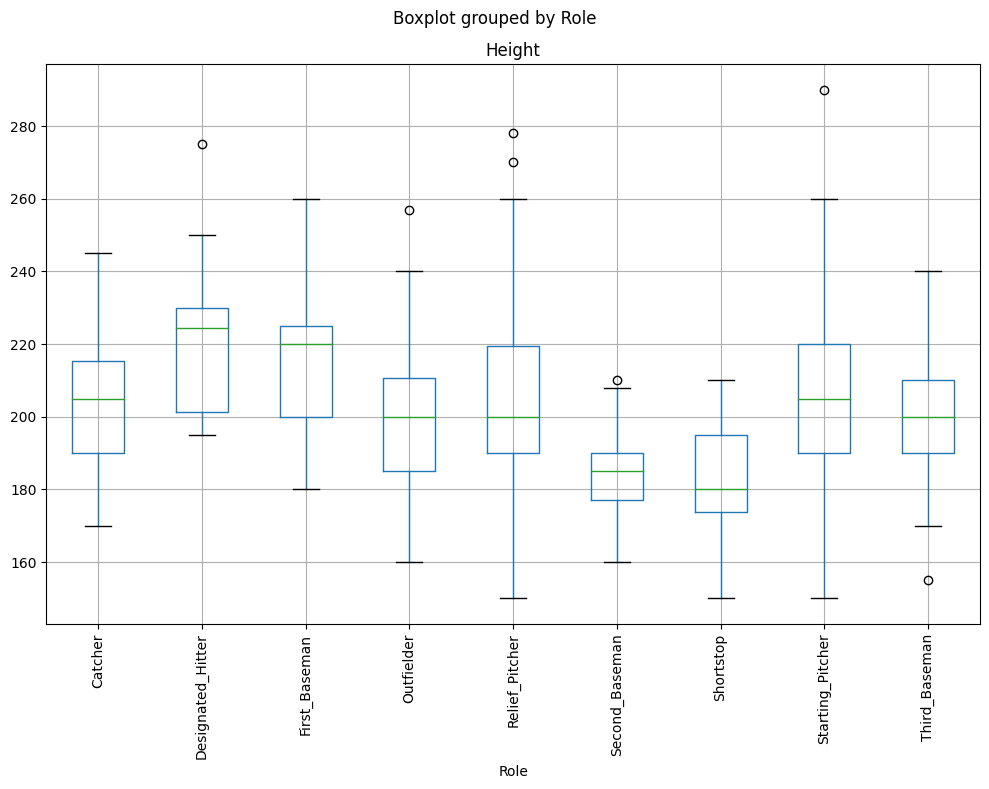

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Lưu ý**: Biểu đồ này gợi ý rằng, trung bình, chiều cao của các cầu thủ chơi ở vị trí gôn một cao hơn chiều cao của các cầu thủ chơi ở vị trí gôn hai. Sau này, chúng ta sẽ học cách kiểm tra giả thuyết này một cách chính thức hơn, và cách chứng minh rằng dữ liệu của chúng ta có ý nghĩa thống kê để thể hiện điều đó.

Tuổi, chiều cao và cân nặng đều là các biến ngẫu nhiên liên tục. Bạn nghĩ phân phối của chúng như thế nào? Một cách tốt để tìm hiểu là vẽ biểu đồ histogram của các giá trị:


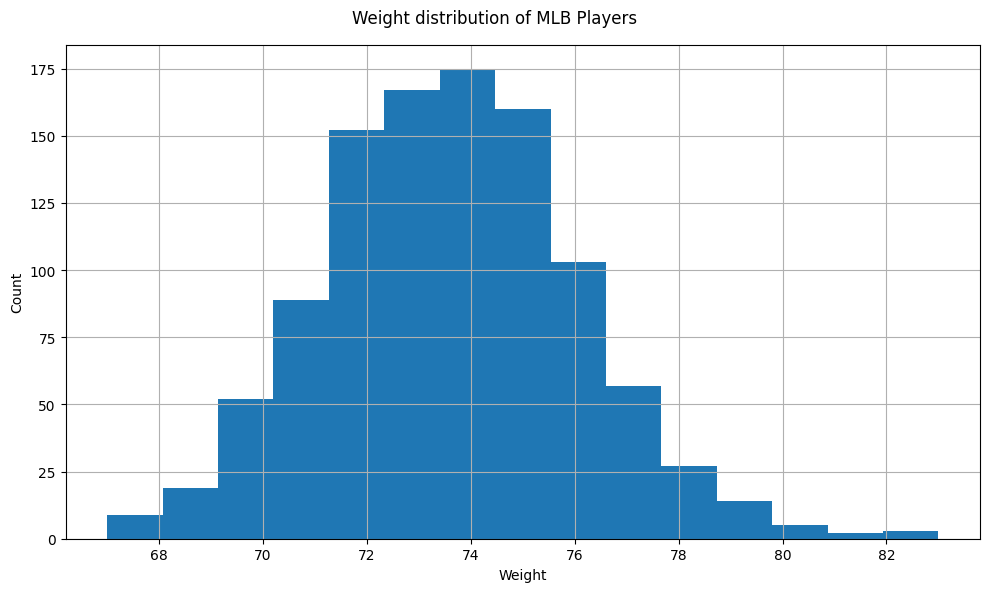

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Phân phối chuẩn

Hãy tạo một mẫu trọng lượng nhân tạo tuân theo phân phối chuẩn với cùng giá trị trung bình và phương sai như dữ liệu thực của chúng ta:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

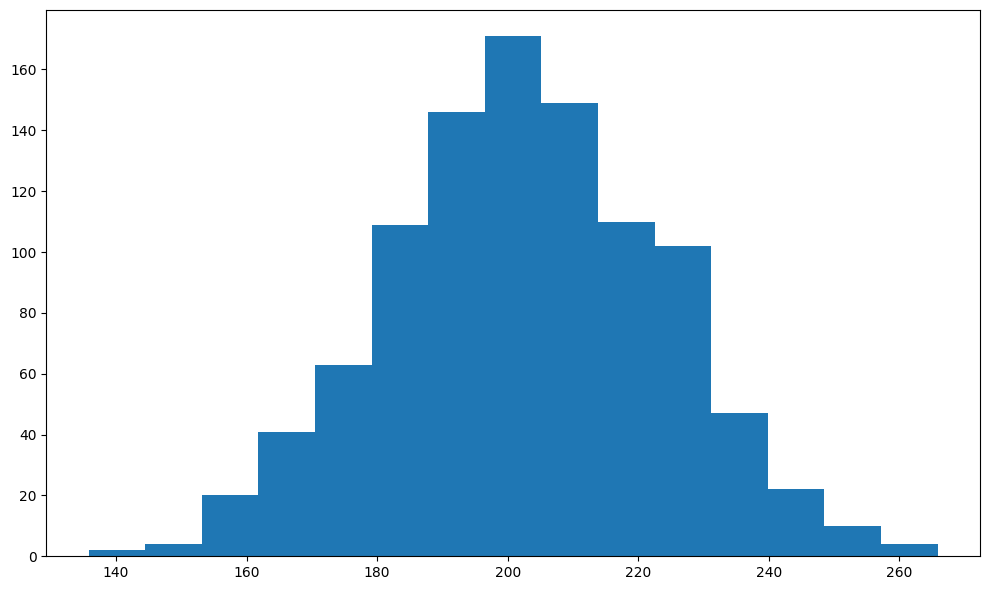

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

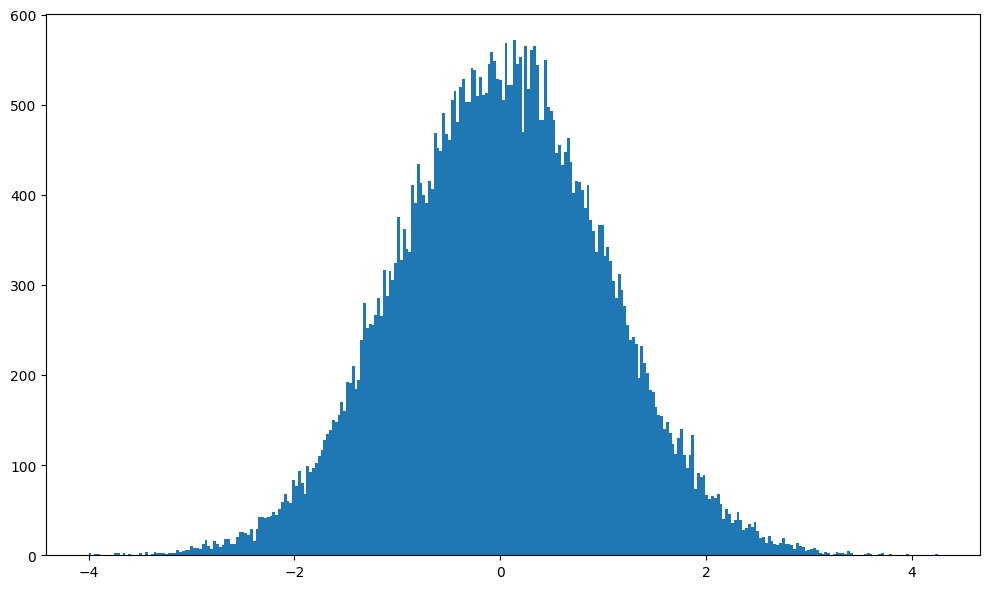

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Vì hầu hết các giá trị trong thực tế phân phối chuẩn, chúng ta không nên sử dụng bộ tạo số ngẫu nhiên phân phối đều để tạo dữ liệu mẫu. Đây là điều xảy ra nếu chúng ta cố gắng tạo trọng lượng với phân phối đều (được tạo bởi `np.random.rand`):


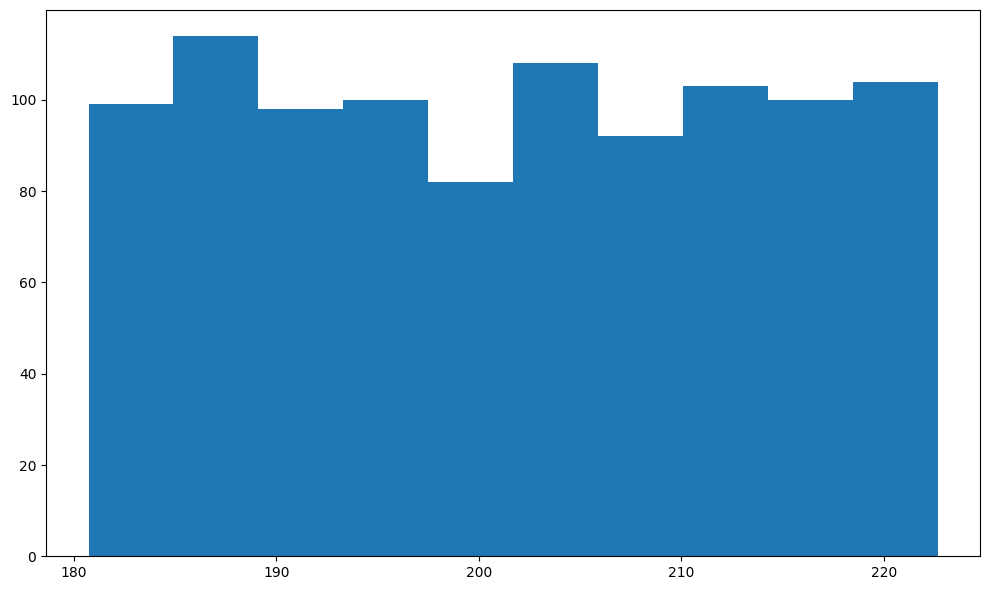

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Khoảng tin cậy

Bây giờ, chúng ta hãy tính toán khoảng tin cậy cho cân nặng và chiều cao của các cầu thủ bóng chày. Chúng ta sẽ sử dụng đoạn mã [từ cuộc thảo luận trên stackoverflow này](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Kiểm định giả thuyết

Hãy cùng khám phá các vai trò khác nhau trong tập dữ liệu cầu thủ bóng chày của chúng ta:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Chúng ta có thể thấy rằng các khoảng không chồng lấn lên nhau.

Một cách thống kê chính xác hơn để chứng minh giả thuyết là sử dụng **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Hai giá trị được trả về bởi hàm `ttest_ind` là:  
* p-value có thể được xem như xác suất hai phân phối có cùng giá trị trung bình. Trong trường hợp của chúng ta, giá trị này rất thấp, nghĩa là có bằng chứng mạnh mẽ cho thấy các cầu thủ ở vị trí gôn một cao hơn.  
* t-value là giá trị trung gian của sự khác biệt trung bình đã được chuẩn hóa, được sử dụng trong kiểm định t-test, và nó được so sánh với một giá trị ngưỡng cho một mức độ tin cậy nhất định.  


## Mô phỏng phân phối chuẩn với Định lý Giới hạn Trung tâm

Bộ tạo số giả ngẫu nhiên trong Python được thiết kế để cung cấp cho chúng ta một phân phối đều. Nếu chúng ta muốn tạo một bộ tạo cho phân phối chuẩn, chúng ta có thể sử dụng định lý giới hạn trung tâm. Để có được một giá trị phân phối chuẩn, chúng ta chỉ cần tính trung bình của một mẫu được tạo ngẫu nhiên theo phân phối đều.


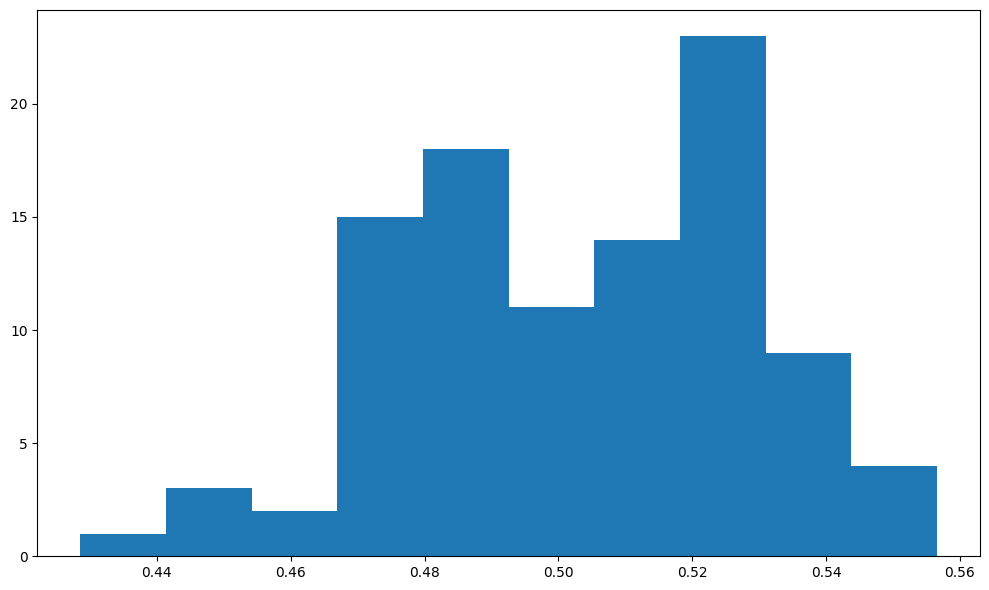

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Mối tương quan và Công ty Bóng chày Xấu xa

Mối tương quan cho phép chúng ta tìm ra mối quan hệ giữa các chuỗi dữ liệu. Trong ví dụ minh họa của chúng ta, hãy giả sử có một công ty bóng chày xấu xa trả lương cho các cầu thủ dựa trên chiều cao của họ - cầu thủ càng cao thì càng được trả nhiều tiền. Giả sử có một mức lương cơ bản là $1000, và một khoản thưởng bổ sung từ $0 đến $100, tùy thuộc vào chiều cao. Chúng ta sẽ lấy dữ liệu từ các cầu thủ thực sự trong MLB và tính toán mức lương tưởng tượng của họ:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Bây giờ hãy tính hiệp phương sai và hệ số tương quan của các dãy đó. `np.cov` sẽ cho chúng ta một **ma trận hiệp phương sai**, đây là một mở rộng của hiệp phương sai cho nhiều biến. Phần tử $M_{ij}$ của ma trận hiệp phương sai $M$ là hệ số tương quan giữa các biến đầu vào $X_i$ và $X_j$, và các giá trị đường chéo $M_{ii}$ là phương sai của $X_{i}$. Tương tự, `np.corrcoef` sẽ cho chúng ta **ma trận tương quan**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


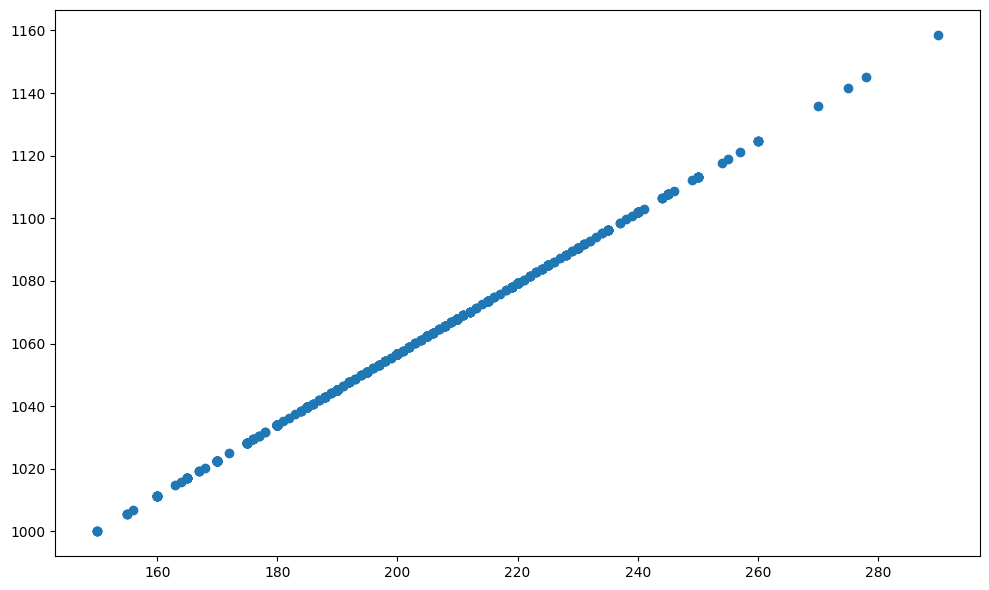

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Trong trường hợp này, mối tương quan nhỏ hơn một chút, nhưng nó vẫn khá cao. Bây giờ, để làm cho mối quan hệ ít rõ ràng hơn, chúng ta có thể muốn thêm một số yếu tố ngẫu nhiên bằng cách thêm một biến ngẫu nhiên vào mức lương. Hãy xem điều gì sẽ xảy ra:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


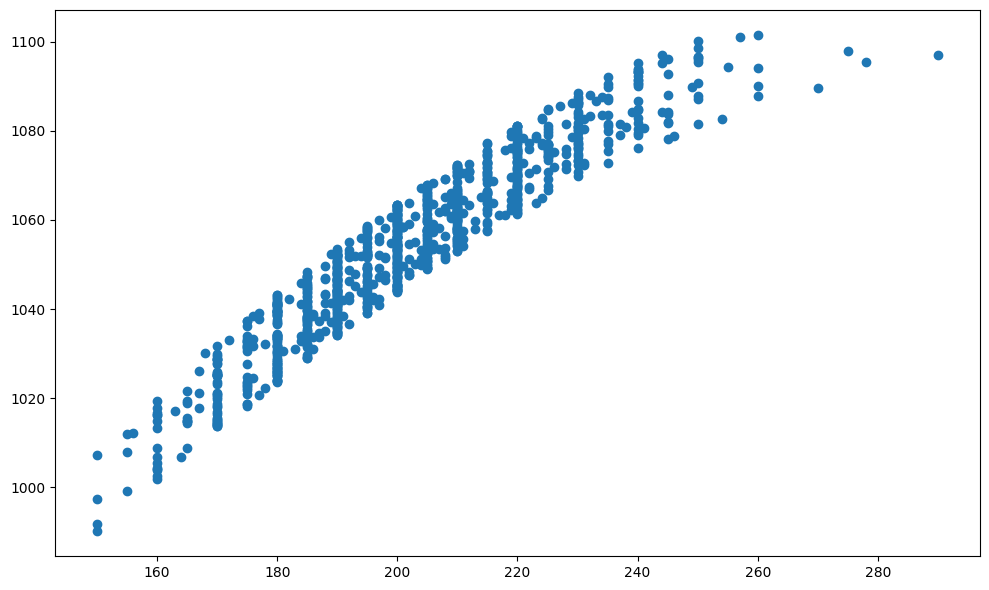

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Bạn có đoán được tại sao các chấm lại xếp thành các đường thẳng đứng như thế này không?

Chúng tôi đã quan sát mối tương quan giữa một khái niệm được tạo ra một cách nhân tạo như lương và biến quan sát *chiều cao*. Hãy cùng xem liệu hai biến quan sát, chẳng hạn như chiều cao và cân nặng, có tương quan với nhau không:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Rất tiếc, chúng ta không nhận được kết quả nào - chỉ có một số giá trị `nan` kỳ lạ. Điều này xảy ra do một số giá trị trong chuỗi của chúng ta không được xác định, được biểu thị bằng `nan`, dẫn đến kết quả của phép toán cũng không được xác định. Khi xem xét ma trận, chúng ta có thể thấy rằng cột `Weight` là vấn đề, vì sự tự tương quan giữa các giá trị `Height` đã được tính toán.

> Ví dụ này cho thấy tầm quan trọng của việc **chuẩn bị dữ liệu** và **làm sạch dữ liệu**. Nếu không có dữ liệu phù hợp, chúng ta không thể tính toán được gì.

Hãy sử dụng phương pháp `fillna` để điền vào các giá trị bị thiếu và tính toán sự tương quan:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

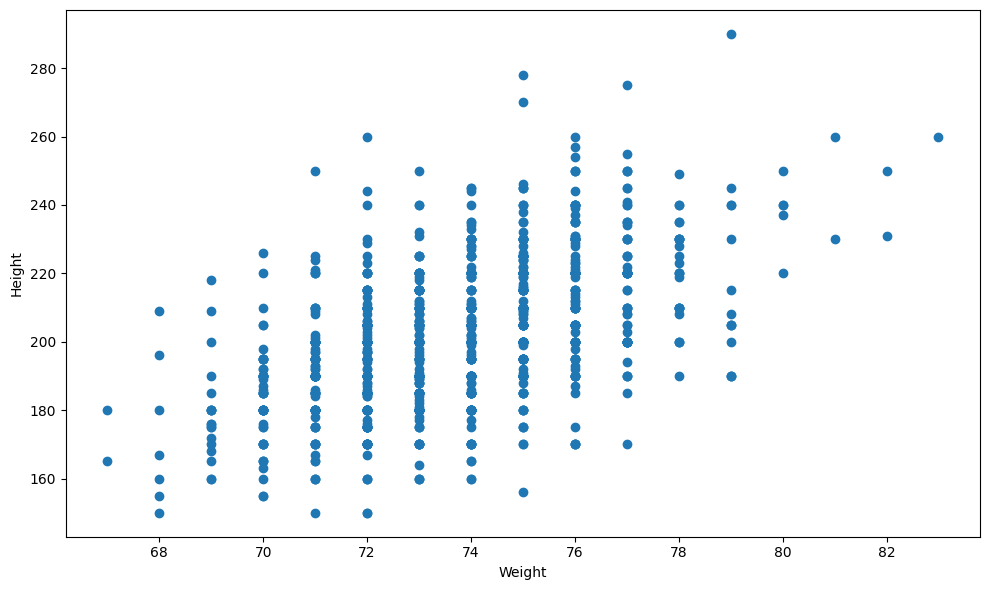

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Kết luận

Trong notebook này, chúng ta đã học cách thực hiện các thao tác cơ bản trên dữ liệu để tính các hàm thống kê. Chúng ta hiện đã biết cách sử dụng một bộ công cụ toán học và thống kê vững chắc để chứng minh một số giả thuyết, cũng như cách tính khoảng tin cậy cho các biến bất kỳ dựa trên một mẫu dữ liệu.



---

**Tuyên bố miễn trừ trách nhiệm**:  
Tài liệu này đã được dịch bằng dịch vụ dịch thuật AI [Co-op Translator](https://github.com/Azure/co-op-translator). Mặc dù chúng tôi cố gắng đảm bảo độ chính xác, xin lưu ý rằng các bản dịch tự động có thể chứa lỗi hoặc sự không chính xác. Tài liệu gốc bằng ngôn ngữ bản địa nên được coi là nguồn tham khảo chính thức. Đối với các thông tin quan trọng, nên sử dụng dịch vụ dịch thuật chuyên nghiệp từ con người. Chúng tôi không chịu trách nhiệm cho bất kỳ sự hiểu lầm hoặc diễn giải sai nào phát sinh từ việc sử dụng bản dịch này.
